# My First Data Science Project

## Analyzing Prison Helicopter Escapes

We begin by importing some helper functions.

In [1]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes] (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

Let's print the first three rows

In [3]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Removing details

We remove the details column (last column) from the lists so the data is more readable

In [4]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [5]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Changing date format

We change the date format from being "Month Day, Year" to being just "Year", so we can use it below.

In [6]:
for row in data:
    row[0] = fetch_year(row[0])

In [7]:
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Creating a frequency table for prison breaks using helicopters each year

We first get the minimum and maximum year stored in the data.

In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

In [9]:
print(min_year, max_year)

1971 2020


Next we create a list of lists in which each year is initially assigned the value of 0.

In [10]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

In [11]:
attempts_per_year = []
for date in years:
    temp_list = [date, 0]
    attempts_per_year.append(temp_list)

In [12]:
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


Next we compare the year in our list of lists with the years in each row of the data, and if we find a match, we increase the frequency of the year matched in our list of lists.

In [13]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


For readability, we represent our results visually.

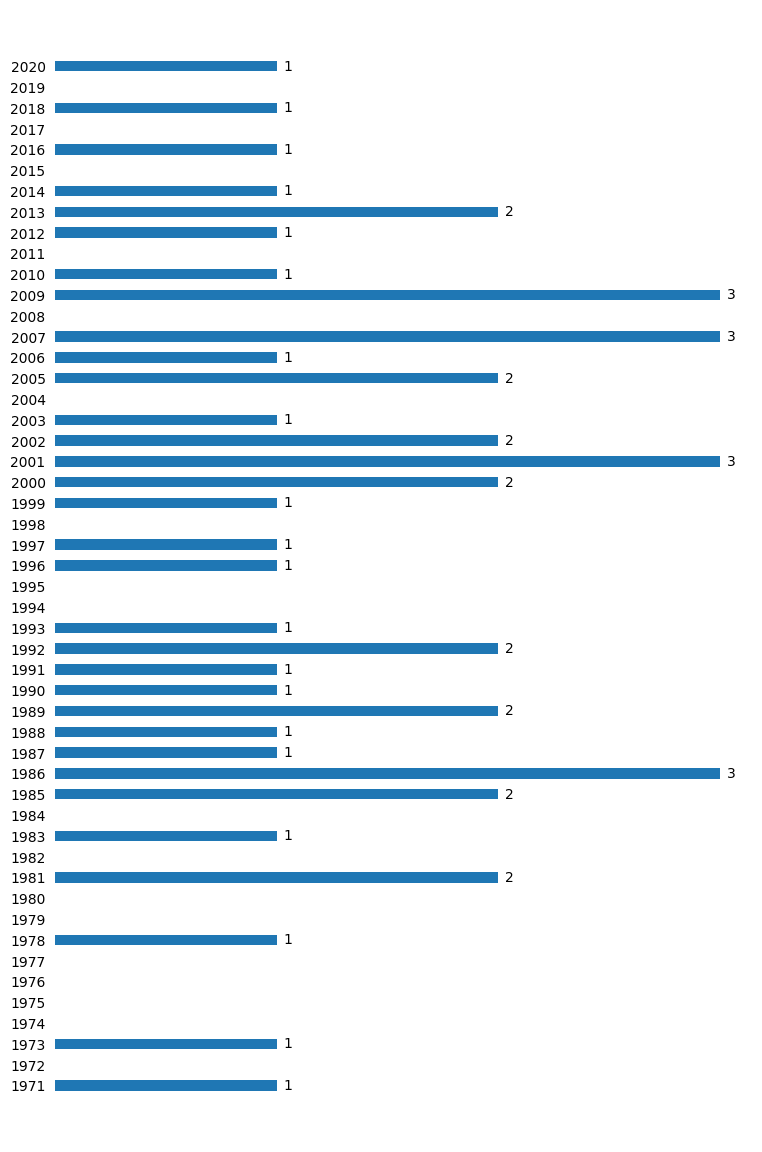

In [14]:
%matplotlib inline
barplot(attempts_per_year)

We can see that the most attempts at breaking out of prison with a helicopter happened in 1986, 2001, 2007, and 2009, with a total of three (3) attempts in each of those years!

## Creating a frequency table for prison breaks using helicopters in each country

Next, we use a different method to plot a frequency table for the number of occurences in each country in the data.

In [15]:
countries_frequency = df["Country"].value_counts()

In [16]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Belgium,4
Canada,4
Greece,4
Brazil,2
Australia,2
United Kingdom,2
Italy,1
Russia,1


We can see that the most attempts at breaking out of prison with a helicopter happened in France, with a total of fifteen (15) attempts!

## Which prisoners attempted to esccape more than once using a helicopter?

To answer the quetion above, we can get the number of attempts of each escapee using the dataframe from the helper file.

In [17]:
escapees_frequency = df["Escapee(s)"].value_counts()

We can convert the frequency into a list, and then create a list of lists of each prisoner's name and the number of attempts.

In [18]:
escapees_frequency_list = list(escapees_frequency)

In [19]:
list_of_names = []
index = 0
for col_name in escapees_frequency.keys():
    temp_list1 = [col_name, escapees_frequency_list[index]]
    list_of_names.append(temp_list1)
    index += 1
list_of_names = list_of_names[1:]

For readability, we can plot a bar plot of the list of lists created above.

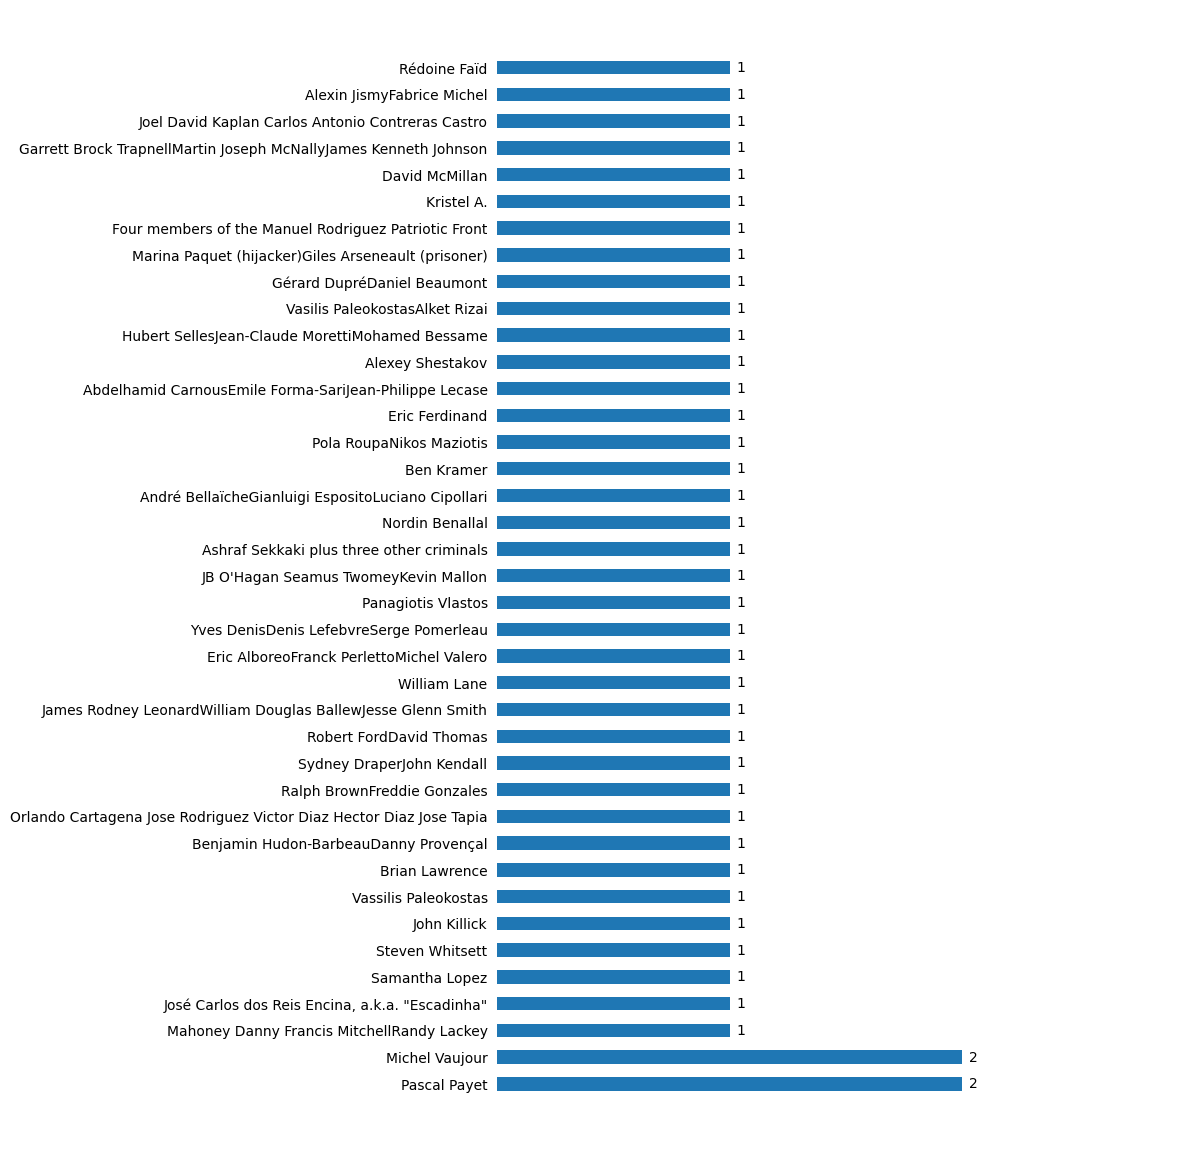

In [20]:
%matplotlib inline
barplot(list_of_names)

We can see that the prisoners who have done it more than once are Michel Vaujour and Pascal Payet, with 2 prison escape attempts each!